In [14]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.tools import spectral_function, unit_converter
from qsextra.spectroscopy import FeynmanDiagram, clspectroscopy
from qsextra.spectroscopy.postprocessing import postprocessing
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

In [15]:
epsilon = [1.55, 1.46]    # [eV]
J = toeplitz([0., -0.01])    # [eV]
N = len(epsilon)

In [16]:
esys = ExcitonicSystem(energies=epsilon,
                       dipole_moments=[1.] * N,
                       couplings=J,
                       )

In [17]:
dt_fs = 0.1    # [fs]
t_final = 200.    # [fs]
t_list_plot = np.arange(0, t_final + dt_fs, dt_fs)    # [fs]
# Now convert to eV^-1
t_list = unit_converter(t_list_plot, initial_unit='fs',
                        final_unit='eV-1')    # [eV-1]
dt = t_list[1] - t_list[0]    # [eV-1]
# For the quantum execution we reduce the time list in order to save computational time
times_plot = np.arange(0, t_final + dt_fs, 100 * dt_fs)    # [fs]
times = unit_converter(times_plot, initial_unit='fs',
                       final_unit='eV-1')    # [eV-1]

Gamma = 59.08 * 10**(-3)

spec = FeynmanDiagram('a', times)

# Exciton System

In [18]:
signal_ex = clspectroscopy(esys, spec, rates=Gamma/4)

There are no coincidences in this world. [Master Oogway]


/home/juu8242/opt/anaconda3/envs/qsextra/lib/python3.11/site-packages/scipy/integrate/_ode.py:431: UserWarning: _zvode: Excess work done on this call. (Perhaps wrong MF.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


In [19]:
freq, spectrum_ex = postprocessing(spec,
                                   signal_ex,
                                   pad_extension=3,
                                   RF_freq=1.505,
                                   )

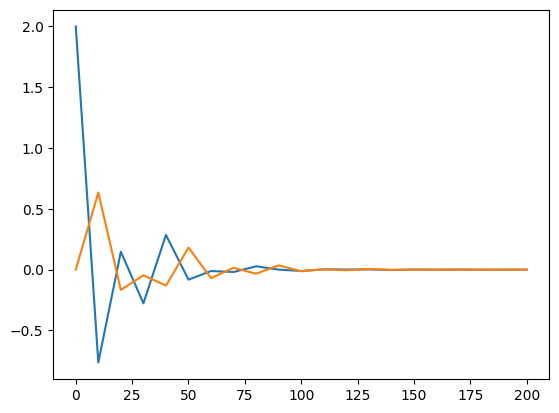

In [20]:
plt.plot(times_plot, signal_ex.real)
plt.plot(times_plot, signal_ex.imag)

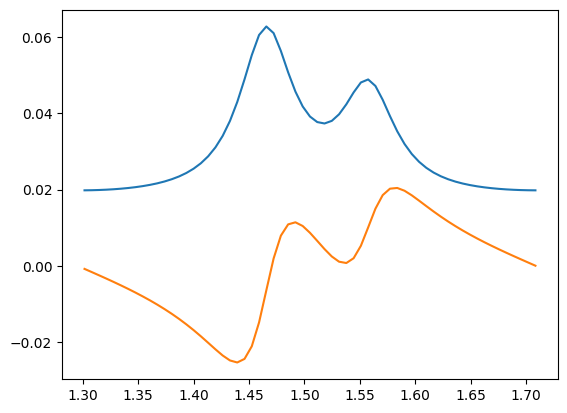

In [24]:
plt.plot(freq, spectrum_ex.real)
plt.plot(freq, spectrum_ex.imag)

# Chromophore system

In [23]:
sys = ChromophoreSystem(excitonic_system=esys)

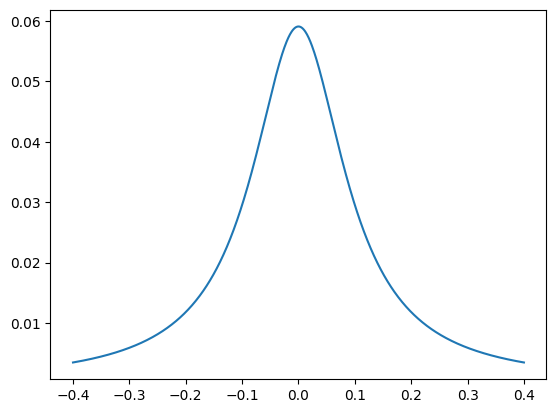

In [10]:
W = 1
frequencies_pseudomode = [0] * W
Gamma_list = [Gamma / W] * W
Omega_list = [0.1] * W
fr, sf = spectral_function(frequencies_pseudomode, Gamma_list, Omega_list)
plt.plot(fr, sf)

In [11]:
sys.pseudomodes(frequencies_pseudomode=frequencies_pseudomode,
                levels_pseudomode=[2]*len(frequencies_pseudomode),
                couplings_ep=np.sqrt(np.array(Gamma_list)
                                     * np.array(Omega_list)/2).tolist(),
                )
coll_rate = (2 * np.array(Omega_list)).tolist()

In [12]:
signal_ch = clspectroscopy(sys, spec, rates=coll_rate)

A wise man can learn more from a foolish question than a fool can learn from a wise answer. [Master Shifu]


In [13]:
freq, spectrum_ch = postprocessing(spec,
                                   signal_ch,
                                   pad_extension=3,
                                   RF_freq=1.505,
                                   )

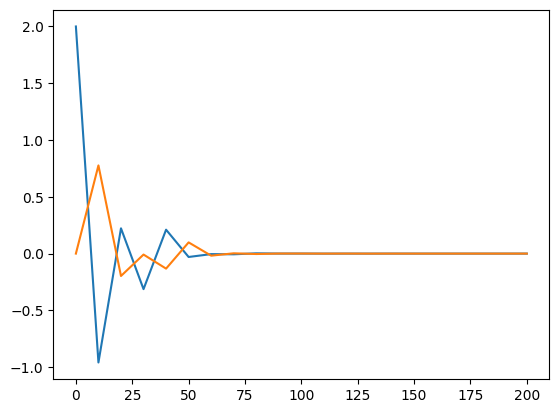

In [14]:
plt.plot(times_plot, signal_ch.real)
plt.plot(times_plot, signal_ch.imag)

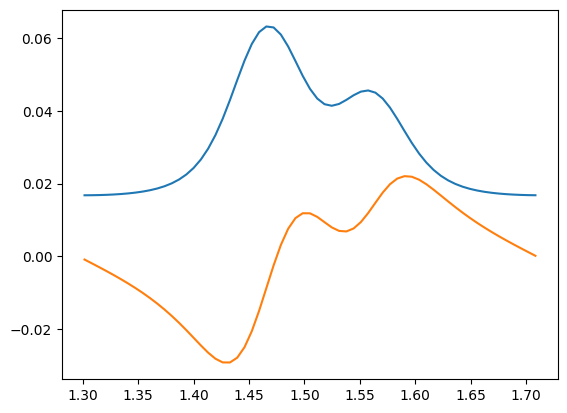

In [15]:
plt.plot(freq, spectrum_ch.real)
plt.plot(freq, spectrum_ch.imag)

# Comparison

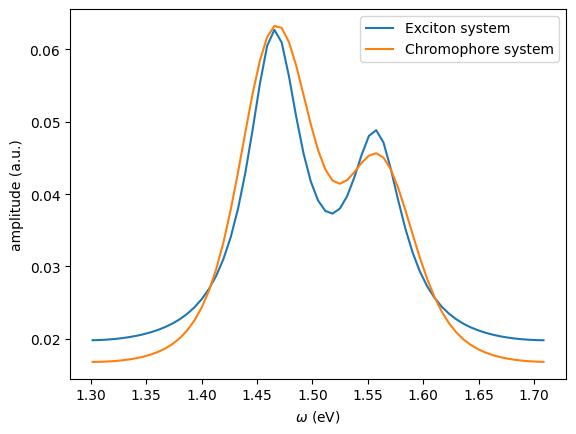

In [16]:
plt.plot(freq, spectrum_ex.real, label='Exciton system')
plt.plot(freq, spectrum_ch.real, label='Chromophore system')
plt.legend()
plt.xlabel(r'$\omega$ (eV)')
plt.ylabel(r'amplitude (a.u.)')